## Importaciones de paquetes

In [33]:
import pandas as pd
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download("stopwords")
# from sklearn import linear_model 

[nltk_data] Downloading package punkt to /home/sandokan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sandokan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## lectura de datos

In [34]:
data = pd.read_csv('./data/news.csv', delimiter=';', header=0)
data.shape
data.head(3)

,News,URL,title,header,link,section
0,Infobae,https://www.infobae.com/,Rusia detuvo a tres expertos que desarrollaron...,"Anatoly Maslov, Alexander Shiplyuk y Valery Zv...",https://www.infobae.com//america/agencias/2023...,Mundo
1,Infobae,https://www.infobae.com/,Angustia y vértigo en Italia: quedaron atrapad...,Las autoridades dijeron que han tenido que ser...,https://www.infobae.com//america/mundo/2023/05...,Mundo
2,Infobae,https://www.infobae.com/,Alerta climática: para 2027 las temperaturas p...,Los expertos de la Organización Meteorológica ...,https://www.infobae.com//america/mundo/2023/05...,Mundo


## tokenización de palabras
Añadimos a su vez la expresión regular  para identificar signos de puntuación y poderlos eliminar.

In [35]:
headers_section = data.groupby('section')['header'].apply(list)
results = headers_section.to_dict()

In [36]:
punctuation_pattern = re.compile(r'[^\w\s]')
stop_words = set(stopwords.words('spanish'))
section_tokens = [] 
for key in results:
    text = " ".join(results[key])
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if( word.lower() not in stop_words) and (not punctuation_pattern.match(word.lower()))]
    section_tokens.append(filtered_tokens)
print(section_tokens)

[['Rumer', 'Willis', 'hija', 'actriz', 'Bruce', 'Willis', 'convirtió', 'madre', 'hace', 'menos', 'mes', 'clip', 'colombiana', 'junto', 'hijos', 'desató', 'inquietudes', 'si', 'padre', 'Gerard', 'Piqué', 'podría', 'reclamar', 'cantante', 'representantes', 'legales', 'intérprete', 'Recuerdo', 'Mordidita', 'aseguran', 'daños', 'reclamados', 'irreales', 'especulativos', 'clip', 'colombiana', 'junto', 'hijos', 'desató', 'inquietudes', 'si', 'padre', 'Gerard', 'Piqué', 'podría', 'reclamar', 'cantante', 'medio', 'rumores', 'reinicio', 'famosa', 'saga', 'protagonista', 'dejó', 'claro', 'cuál', 'opinión'], ['Anatoly', 'Maslov', 'Alexander', 'Shiplyuk', 'Valery', 'Zvegintsev', 'permanecen', 'bajo', 'custodia', 'Kremlin', 'dijo', 'trata', 'asunto', 'seguridad', 'nacional', 'noticia', 'conoce', 'días', 'después', 'Ucrania', 'anunciara', 'derribo', 'seis', 'armas', 'autoridades', 'dijeron', 'ser', 'evacuados', '13.000', 'habitantes', 'menos', 'ocho', 'personas', 'murieron', 'numerosos', 'desapareci

### Para todas las secciones juntas

In [30]:
# text = " ".join(data['header'])
# print(text)
# tokens = word_tokenize(text)
# punctuation_pattern = re.compile(r'[^\w\s]')
# stop_words = set(stopwords.words('spanish')) 
# filtered_tokens = [word for word in tokens if( word.lower() not in stop_words) and (not punctuation_pattern.match(word.lower()))]
# print(filtered_tokens)

## Importación del paquete para generar la nube de palabras

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

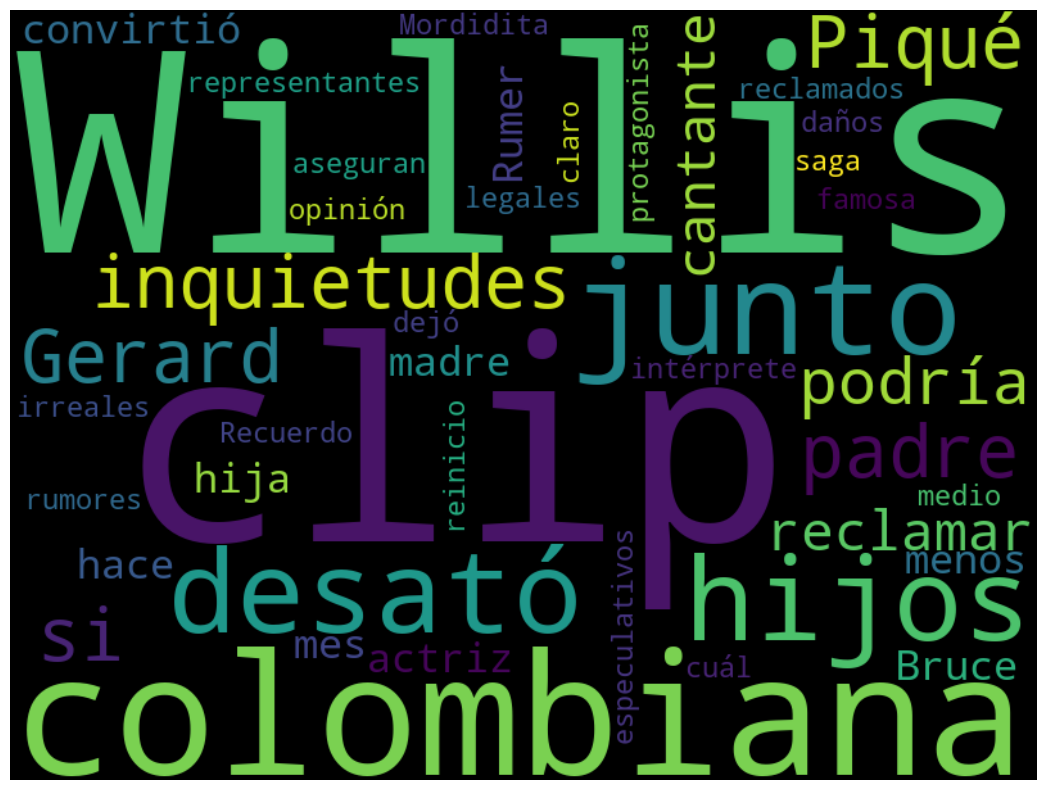

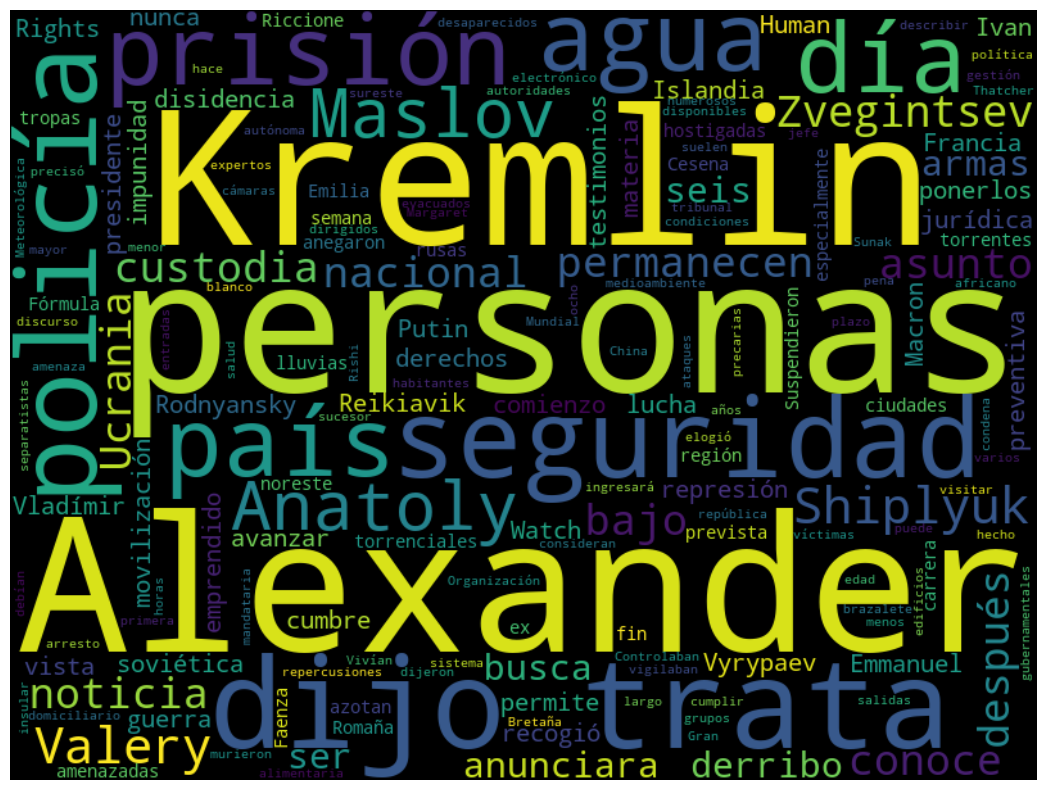

In [38]:
for section in section_tokens:
    wordcloud = WordCloud(width=800, height=600).generate(" ".join(section))
    plt.figure(figsize = (18,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
import string 

In [41]:
news = data['header'].values.tolist()
print(news)

['Anatoly Maslov, Alexander Shiplyuk y Valery Zvegintsev permanecen bajo custodia. El Kremlin dijo que se trata de un asunto de seguridad nacional. La noticia se conoce días después de que Ucrania anunciara el derribo de seis de estas armas', 'Las autoridades dijeron que han tenido que ser evacuados 13.000 habitantes. Al menos ocho personas murieron y hay numerosos desaparecidos', 'Los expertos de la Organización Meteorológica Mundial consideran que el hecho “tendrá repercusiones en la salud de las personas, en la seguridad alimentaria, en la gestión de las aguas y en el medioambiente”', 'La policía del Kremlin busca a Alexander Rodnyansky e Ivan Vyrypaev para ponerlos en prisión preventiva. Desde el comienzo de la guerra, Vladímir Putin ha emprendido una represión de la disidencia nunca vista desde la era soviética', 'Durante una cumbre en Reikiavik (Islandia), el presidente de Francia, Emmanuel Macron, dijo que se trata de “una movilización jurídica que nos permite avanzar en materia

In [48]:
tfidf_vectorizer = TfidfVectorizer(
                        tokenizer  = word_tokenize,
                        min_df     = 1,
                        stop_words = list(stop_words)+list(string.punctuation),
                        ngram_range =(1,2)
                    )
tfidf_vectorizer.fit(news)

/home/sandokan/anaconda3/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/sandokan/anaconda3/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['``'] not in stop_words.
  warnings.warn(


TfidfVectorizer(ngram_range=(1, 2),
                stop_words=['habré', 'fueron', 'estuviésemos', 'hubiéramos',
                            'tenido', 'hayan', 'han', 'habidos', 'donde',
                            'cuando', 'fui', 'hubiera', 'algunos', 'sí', 'tu',
                            'ti', 'es', 'sentida', 'estuviesen', 'nosotras',
                            'nos', 'del', 'les', 'como', 'sentido', 'habían',
                            'seamos', 'tengo', 'hubiese', 'estad', ...],
                tokenizer=<function word_tokenize at 0x7fc0dfaafbe0>)

In [49]:
print(f" Número de tokens creados: {len(tfidf_vectorizer.get_feature_names_out())}")
print(tfidf_vectorizer.get_feature_names_out()[:30])

 Número de tokens creados: 447
['1' '1 prevista' '13.000' '13.000 habitantes' '24' '24 horas' 'actriz'
 'actriz bruce' 'africano' 'africano blanco' 'agua' 'agua anegaron'
 'aguas' 'aguas medioambiente' 'alexander' 'alexander rodnyansky'
 'alexander shiplyuk' 'alimentaria' 'alimentaria gestión' 'amenaza'
 'amenaza largo' 'amenazadas' 'amenazadas tropas' 'anatoly'
 'anatoly maslov' 'anegaron' 'anegaron ciudades' 'anunciara'
 'anunciara derribo' 'armas']
